> # **CNN With Compacted Images**


## 1) Installing Dependencies


In [1]:
!pip install tensorflow --quiet

## 2) Downloading Datasets


In [2]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2024-08-17 16:52:46--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.212.207, 172.217.204.207, 172.217.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.212.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   133MB/s    in 1.1s    

2024-08-17 16:52:47 (133 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]

--2024-08-17 16:52:48--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.212.207, 172.217.204.207, 172.217.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.212.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114

## 3) Unzipping the Images


In [3]:
import zipfile

# Unzip training set
local_zip = "./horse-or-human.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("./horse-or-human")

# Unzip validation set
local_zip = "./validation-horse-or-human.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("./validation-horse-or-human")

zip_ref.close()

## 4) Importing the Datasets


In [16]:
import os

# Directory with training horse pictures
train_horse_dir = os.path.join("./horse-or-human/horses")

# Directory with training human pictures
train_human_dir = os.path.join("./horse-or-human/humans")

# Directory with validation horse pictures
validation_horse_dir = os.path.join("./validation-horse-or-human/horses")

# Directory with validation human pictures
validation_human_dir = os.path.join("./validation-horse-or-human/humans")

train_horse_names = os.listdir(train_horse_dir)
print(f"TRAIN SET HORSES: {train_horse_names[:10]}")

train_human_names = os.listdir(train_human_dir)
print(f"TRAIN SET HUMANS: {train_human_names[:10]}")

validation_horse_hames = os.listdir(validation_horse_dir)
print(f"VAL SET HORSES: {validation_horse_hames[:10]}")

validation_human_names = os.listdir(validation_human_dir)
print(f"VAL SET HUMANS: {validation_human_names[:10]}")

TRAIN SET HORSES: ['horse17-4.png', 'horse26-9.png', 'horse25-4.png', 'horse37-5.png', 'horse22-3.png', 'horse21-6.png', 'horse34-6.png', 'horse15-5.png', 'horse02-7.png', 'horse12-0.png']
TRAIN SET HUMANS: ['human09-21.png', 'human07-12.png', 'human10-26.png', 'human01-22.png', 'human06-12.png', 'human05-10.png', 'human09-24.png', 'human07-13.png', 'human07-03.png', 'human06-28.png']
VAL SET HORSES: ['horse4-232.png', 'horse1-510.png', 'horse3-198.png', 'horse1-384.png', 'horse2-582.png', 'horse4-503.png', 'horse5-458.png', 'horse2-368.png', 'horse3-141.png', 'horse2-314.png']
VAL SET HUMANS: ['valhuman04-06.png', 'valhuman02-19.png', 'valhuman05-09.png', 'valhuman03-16.png', 'valhuman04-15.png', 'valhuman04-05.png', 'valhuman02-07.png', 'valhuman02-08.png', 'valhuman01-12.png', 'valhuman02-21.png']


## 5) Creating the Model


In [5]:
import tensorflow as tf

model = tf.keras.models.Sequential(
    [
        # Note the input shape is the desired size of the image 150x150 with 3 bytes color
        # This is the first convolution
        tf.keras.layers.Conv2D(
            16, (3, 3), activation="relu", input_shape=(150, 150, 3)
        ),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The second convolution
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The third convolution
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The fourth convolution
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The fifth convolution
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(),
        # 512 neuron hidden layer
        tf.keras.layers.Dense(512, activation="relu"),
        # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 6) Logging Details


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 229,537 (896.63 KB)

 Trainable params: 229,537 (896.63 KB)

 Non-trainable params: 0 (0.00 B)

## 7) Compiling the Model


In [7]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    loss="binary_crossentropy",
    optimizer=RMSprop(learning_rate=0.001),
    metrics=["accuracy"],
)

## 8) Preprocessing the Data


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1 / 255)
validation_datagen = ImageDataGenerator(rescale=1 / 255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    "./horse-or-human/",  # This is the source directory for training images
    target_size=(150, 150),  # All images will be resized to 150x150
    batch_size=128,
    # Since you used binary_crossentropy loss, you need binary labels
    class_mode="binary",
)

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    "./validation-horse-or-human/",  # This is the source directory for training images
    target_size=(150, 150),  # All images will be resized to 150x150
    batch_size=32,
    # Since you used binary_crossentropy loss, you need binary labels
    class_mode="binary",
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## 9) Training the Model


In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=5,
    epochs=5,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=5,
)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.8877 - loss: 0.2870 - val_accuracy: 0.8313 - val_loss: 0.7080
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.7299 - loss: 0.5455 - val_accuracy: 0.7917 - val_loss: 0.5937
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.9361 - loss: 0.2648 - val_accuracy: 0.8687 - val_loss: 0.6555
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8769 - loss: 0.2586 - val_accuracy: 0.7292 - val_loss: 1.0043
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.7598 - loss: 0.7341 - val_accuracy: 0.8250 - val_loss: 0.6491


## 10) Validate Using Uploads


In [13]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

    # predicting images
    path = "/content/" + fn
    img = load_img(path, target_size=(150, 150))
    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0] > 0.5:
        print(fn + " is a human")
    else:
        print(fn + " is a horse")

Saving images.jpeg to images.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 23s 23s/step
[0.00683392]
images.jpeg is a horse


## 11) Visualizing the Images


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


<ipython-input-17-1bbf3e301bf5>:47: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
<ipython-input-17-1bbf3e301bf5>:50: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


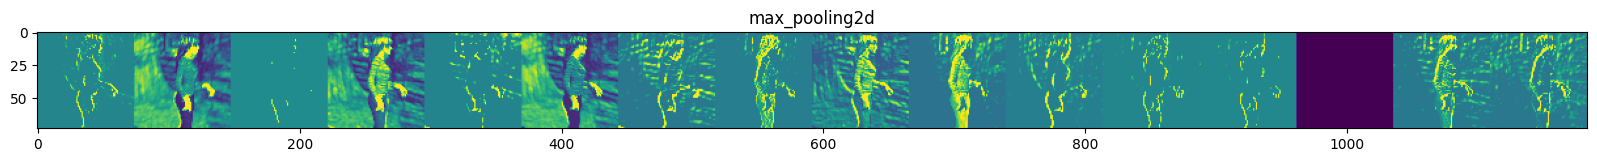

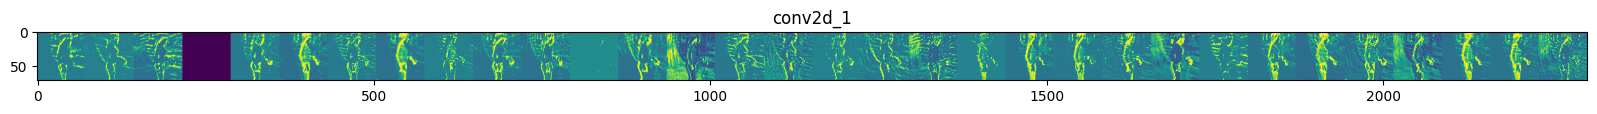

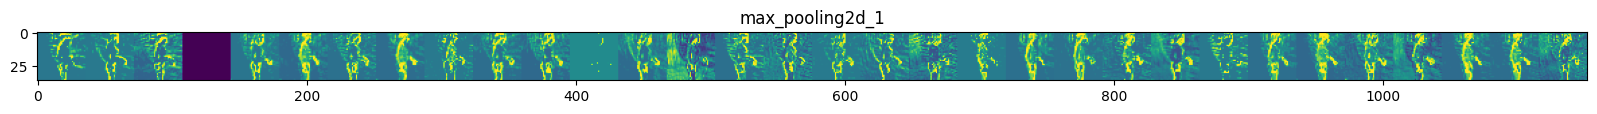

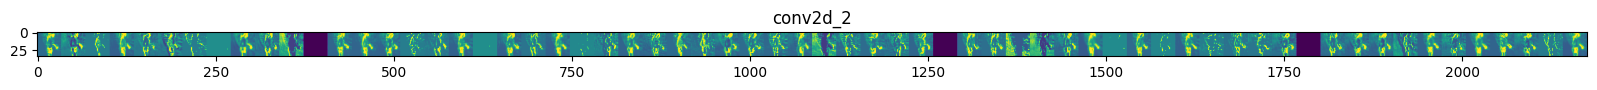

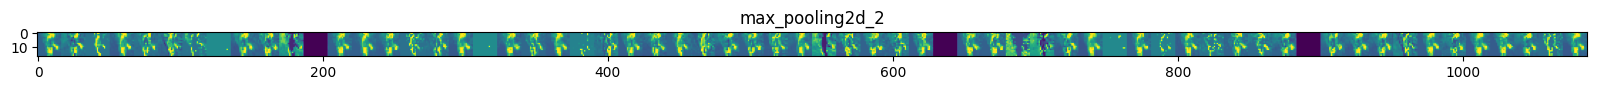

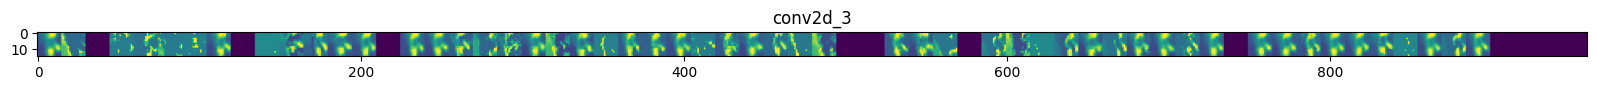

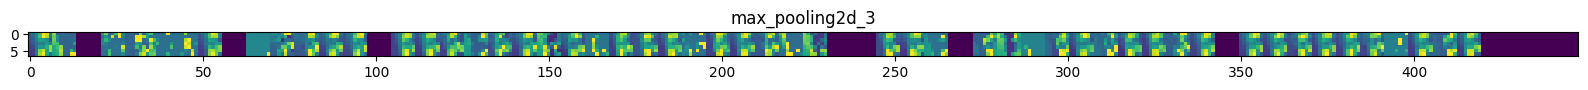

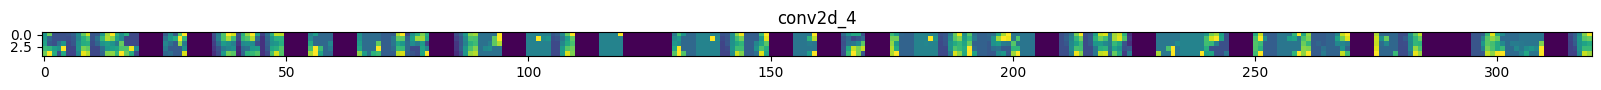

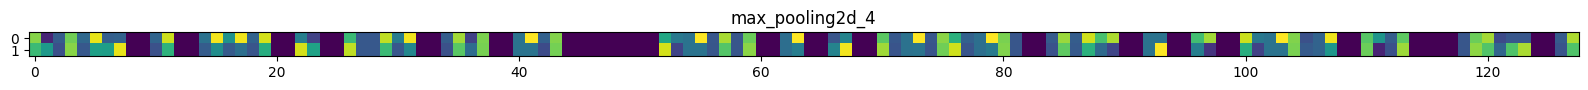

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.inputs, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')